# From semantic to instance segmentation

The goal of this model is to produce instance segmentation for images starting from the semantic segmentation.

Desirable characteristics:
- speed
- simplicity

This model is trained and evaluated on the PASCAL VOC 2012 dataset. More datasets will be added in the future.

In [1]:
#standard library modules


#third party modules
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as T

#my own modules
from custom_datasets import VOCClass2Object

#set plt sizes
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
#root directory of dataset in my pc
dset_root = "/home/cyrus/Documents/datasets"

#dataset transform parameters
IMG_SIZE = 1024

#create dataset transforms if any
resize_transform = T.Compose([T.Resize((IMG_SIZE, IMG_SIZE)), T.ToTensor()])

#create datasets for train and val
VOC_train = VOCClass2Object(dset_root,
                            image_set = "train",
                            transform = resize_transform,
                            target_transform = resize_transform)
VOC_val = VOCClass2Object(dset_root,
                          image_set = "val",
                          transform = resize_transform,
                          target_transform = resize_transform)

#dataloader parameters
batch_size = 1
n_workers = 0

#create dataloaders
#TODO: check performance of pin_memory and num_workers
loader_train = DataLoader(VOC_train,
                          batch_size = batch_size,
                          shuffle = False,
                          num_workers = n_workers,
                          pin_memory = True)
loader_val = DataLoader(VOC_val,
                        batch_size = batch_size,
                        shuffle = False,
                        num_workers = n_workers,
                        pin_memory = True)

Samples:


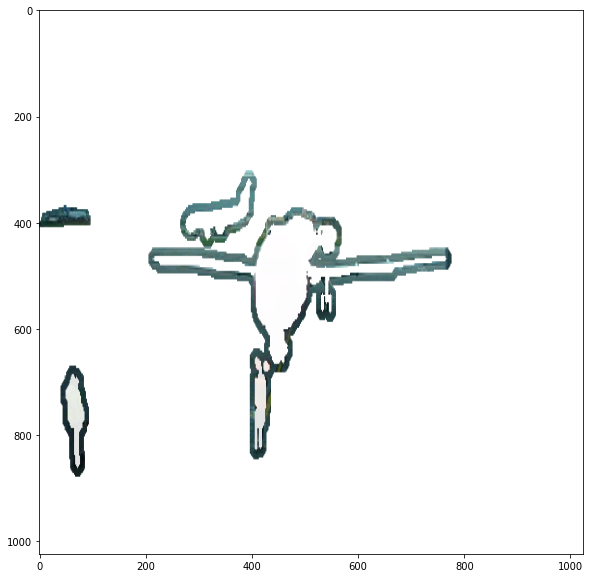

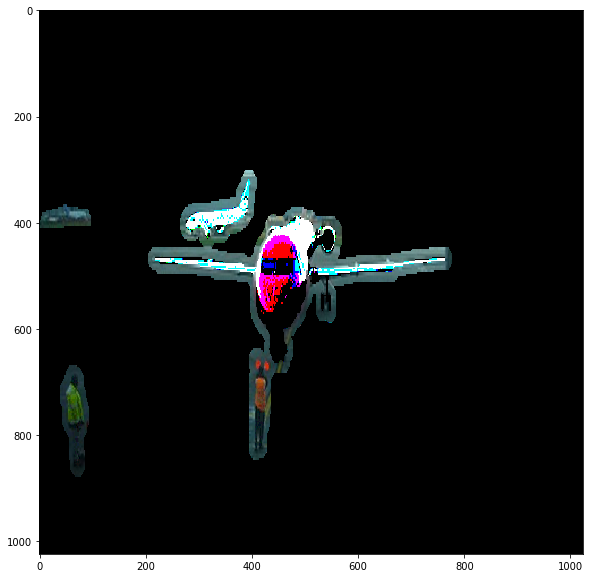

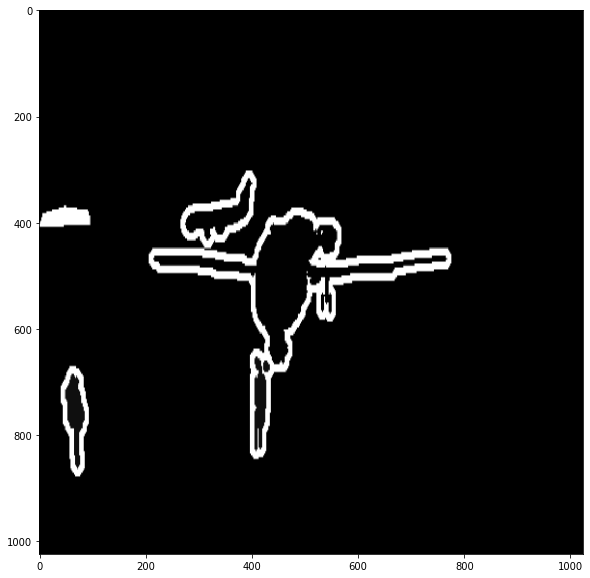

Labels:


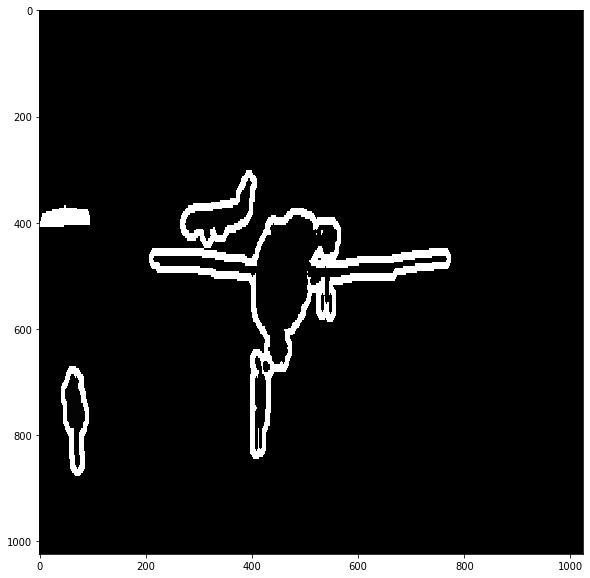

In [5]:
#get an example batch from the training set
dataiter = iter(loader_train)
samples, labels = next(dataiter)

plt.rcParams['figure.figsize'] = (20.0, 10.0)

print("Samples:")
#plot samples (separating rgb and alpha)
samples_rgb = samples[:, 0:3, :, :]
samples_alpha = samples[:, 3:4, :, :]

plt.imshow(np.transpose(samples[0], (1,2,0)))
plt.savefig("tensor2.png")
plt.show()

#use makegrid
grid = torchvision.utils.make_grid(samples_rgb, pad_value = 1.0)
plt.imshow(np.transpose(grid, (1,2,0)))
plt.show()
grid = torchvision.utils.make_grid(samples_alpha, pad_value = 1.0)
plt.imshow(np.transpose(grid, (1,2,0)))
plt.show()

print("Labels:")
#plot labels
grid = torchvision.utils.make_grid(labels, pad_value = 1.0)
plt.imshow(np.transpose(grid, (1,2,0)))
plt.show()

The first set of images above contains the original rgb images concatenated with class segmentations. Class segmentations are represented with greyscale values between 0 and 255; 255 is unlabelled and shouldn't be considered in training and evaluation.

The second set of images contains object segmentation, where each object is assigned an index from 1 onwards irrespectively of the class. Again, pixels with a value of 255 are unlabelled and should be ignored.



In [4]:
print(samples_rgb[:, 0, 400:600, 400:600].tolist())

#then normalise

[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3686274588108063, 0.3607843220233917, 0.4745098054409027, 0.5803921818733215, 0.5607843399047852, 0.42352941632270813, 0.3490196168422699, 0.364705890417099, 0.3803921639919281, 0.38823530077934265, 0.38823530077934265, 0.3686274588108063, 0.3529411852359772, 0.3450980484485626, 0.33725491166114807, 0.34117648005485535, 0.3529411852359772, 0.35686275362968445, 0.3607843220233917, 0.364705890417099, 0.364705890417099, 0.35686275362968445, 0.3490196168422699, 0.34117648005485535, 0.3294117748737335, 0.34117648005485535, 0.3529411852359772, 0.35686275362968445, 0.35686275362968445, 0.3490196168422699, 0.3333333432674408, 0.3294117748737335, 0.32549020648002625, 0.3686274588108063, 0.42352941632270813, 0.4627451002597809, 0.49803921580314636, 0.4588235318660736, 0.38823530077934265, 0.4117647111415863, 0.5372549295425415, 0.572549045085907, 0.4941176474094391, 0